<a href="https://colab.research.google.com/github/MatthewSteen/USA-Politics/blob/energy%2Findependence/energy/independence/energy_independence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Independence

Energy independence is an ambiguous term without a clear definition[^1] [^2]. Generally speaking, the United States became "energy independent" in 2019[^3], meaning it was a *net* exporter of energy. Since then, there have been many claims from politicians that they were responsible for "energy independence" and/or they will make the US "energy independent" again (implying that it has not been since).

[^1]: https://en.wikipedia.org/wiki/United_States_energy_independence
[^2]: https://usafacts.org/articles/is-the-us-energy-independent/
[^3]: https://www.eia.gov/energyexplained/us-energy-facts/imports-and-exports.php

The purpose of this analysis is to project when the US would have become energy independent if the trend in energy consumption, production, imports, and exports had continued without the effects of the 45th and 46th Presidential administrations.

## Methodology

This analysis uses raw data of energy consumption, production, imports, and exports from 1950-2023[^3]. A subset of that data from 2005 (when energy imports peaked) through 2016 (Obabma's last year in office) is used to perform a linear extrapolation through 2023.

In [2]:
# import python libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# raw data
data = 'https://www.eia.gov/energyexplained//us-energy-facts/charts/import-exports-primary-energy-overview.csv'

In [4]:
# read raw data into a pandas dataframe to inspect it
df = pd.read_csv(data)
df

,"U.S. primary energy overview, 1950-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,quadrillion British thermal units,NaN,NaN,NaN,NaN
1,Data source: U.S. Energy Information Administr...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,An interactive line chart showing amounts of U...,NaN,NaN,NaN,NaN
4,NaN,consumption,production,imports,exports
...,...,...,...,...,...
74,2019,96.60,97.60,22.87,23.48
75,2020,88.85,91.86,19.99,23.46
76,2021,93.36,93.84,21.46,25.07
77,2022,94.79,98.53,21.51,27.33


In [5]:
# looks like the first 5 rows are metadata and the data starts after the
# header row: year (missing), consumption, production, imports, and exports

# read raw data again and set header to row index 5
df = pd.read_csv(data, header=5)
df

,Unnamed: 0,consumption,production,imports,exports
0,1950,33.53,34.46,1.91,1.47
1,1951,35.89,37.67,1.89,2.62
2,1952,35.63,36.81,2.15,2.37
3,1953,36.60,37.13,2.31,1.87
4,1954,35.63,35.53,2.35,1.70
...,...,...,...,...,...
69,2019,96.60,97.60,22.87,23.48
70,2020,88.85,91.86,19.99,23.46
71,2021,93.36,93.84,21.46,25.07
72,2022,94.79,98.53,21.51,27.33


In [6]:
# fix header by adding 'year'
df.columns = ['year', 'consumption', 'production', 'imports', 'exports']

# set index column to 'year'
df.set_index('year', inplace=True)

# show
df

,consumption,production,imports,exports
year,,,,
1950,33.53,34.46,1.91,1.47
1951,35.89,37.67,1.89,2.62
1952,35.63,36.81,2.15,2.37
1953,36.60,37.13,2.31,1.87
1954,35.63,35.53,2.35,1.70
...,...,...,...,...
2019,96.60,97.60,22.87,23.48
2020,88.85,91.86,19.99,23.46
2021,93.36,93.84,21.46,25.07


<Axes: title={'center': 'U.S. primary energy overview, 1950-2023'}, ylabel='quadrillion British thermal units'>

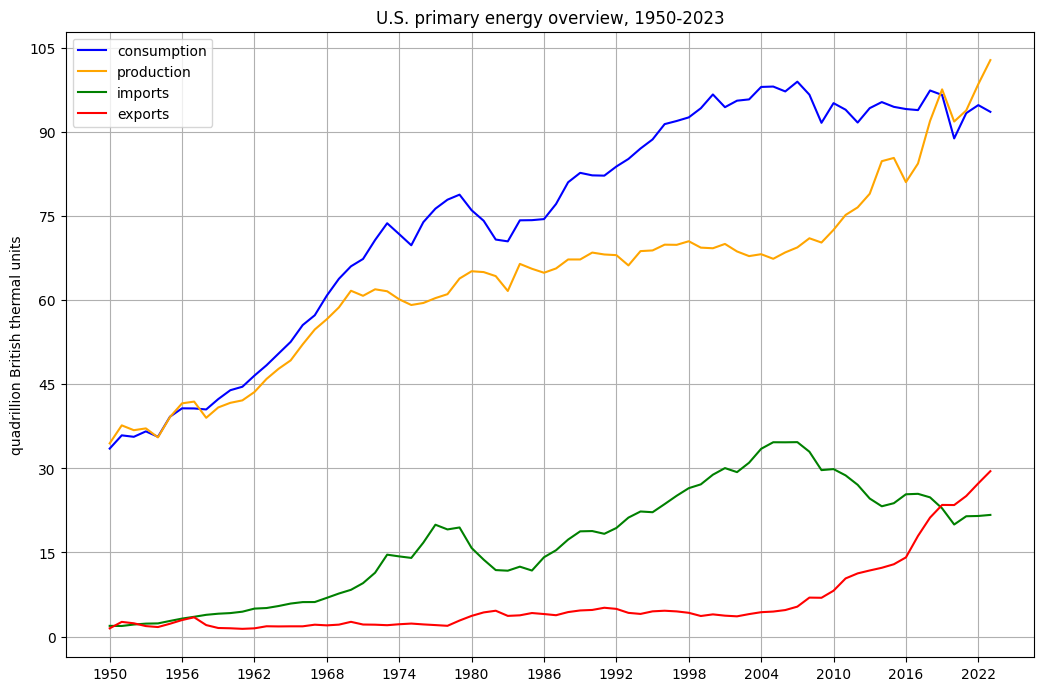

In [7]:
# make a plot that looks similar to the one from the EIA

# plot arguments
kind = 'line'
title = 'U.S. primary energy overview, 1950-2023'
grid = True
xlabel = ''
ylabel = 'quadrillion British thermal units'
xticks = range(1950, 2023, 6)
yticks = range(0, 120, 15)

# matplotlib arguments
figsize = (12.5, 8.125) # 1200 x 780 px @ 96 dpi
line_color = ['blue', 'orange', 'green', 'red']

# use pandas built-in plot method (which uses the matplotlib library) to plot the data
df.plot(kind=kind, title=title, grid=grid, xlabel=xlabel, ylabel=ylabel, xticks=xticks, yticks=yticks, figsize=figsize, color=line_color)

In [8]:
# slice the data starting from 2005 when imports peaked
dfs = df.loc[2005:]
dfs

,consumption,production,imports,exports
year,,,,
2005,98.10,67.38,34.66,4.46
2006,97.23,68.52,34.65,4.73
2007,98.97,69.41,34.68,5.34
2008,96.65,71.04,32.97,6.95
2009,91.63,70.28,29.69,6.92
2010,95.14,72.54,29.87,8.18
2011,93.97,75.20,28.75,10.37
2012,91.68,76.55,27.07,11.27
2013,94.25,78.98,24.62,11.79


In [9]:
# remove the data during Trump's first term (2017-2020) and Biden's first term (2021-2023)
# by assign all values to None (Not a Number, NaN)
dfs.loc[2017:2023] = None
dfs

,consumption,production,imports,exports
year,,,,
2005,98.10,67.38,34.66,4.46
2006,97.23,68.52,34.65,4.73
2007,98.97,69.41,34.68,5.34
2008,96.65,71.04,32.97,6.95
2009,91.63,70.28,29.69,6.92
2010,95.14,72.54,29.87,8.18
2011,93.97,75.20,28.75,10.37
2012,91.68,76.55,27.07,11.27
2013,94.25,78.98,24.62,11.79


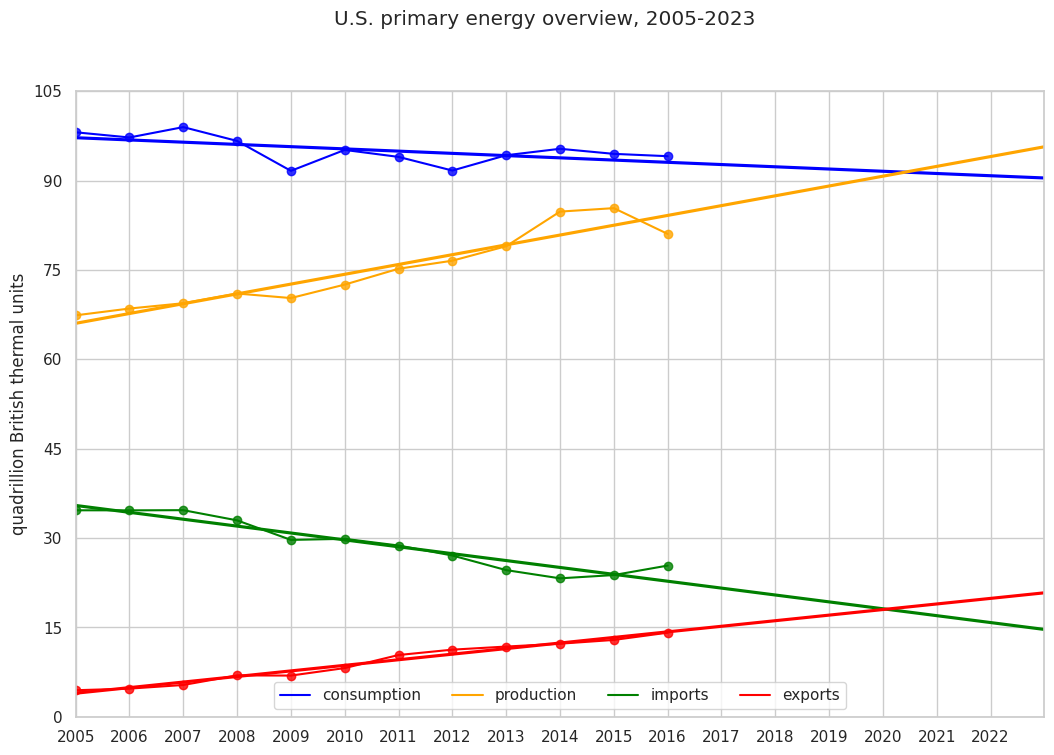

In [10]:
# use seaborn library (based on matplotlib) for its regression plot (regplot)

# match the original EIA plot
style = 'whitegrid'
legend = 'lower center'
title2 = title.replace('1950', '2005')

sns.set_theme()
sns.set_style(style)

# make a matplotlib figure and set the title
fig = plt.figure(figsize=figsize)
fig.suptitle(title2)

# make 1 matplotlib axis on a 1 x 1 subplot
ax = plt.subplot(1, 1, 1)

# set x and y limits
# NOTE these need to be set before the regplot calls or the linear fits will be truncated
ax.set_xlim(2005, 2023)
ax.set_ylim(0, 105)

# set the x and y ticks
ax.set_xticks(range(2005, 2023, 1))
ax.set_yticks(range(0, 120, 15))

# NOTE the following plot calls could be included in a for loop on a dict of {data:color}

# plot the data
ax.plot(dfs.index, dfs['consumption'], label='consumption', color='blue')
ax.plot(dfs.index, dfs['production'], label='production', color='orange')
ax.plot(dfs.index, dfs['imports'], label='imports', color='green')
ax.plot(dfs.index, dfs['exports'], label='exports', color='red')

# plot the data's linear regression fits
sns.regplot(data=dfs, x=dfs.index, y='consumption', scatter=True, fit_reg=True, ci=None, truncate=False, color='blue')
sns.regplot(data=dfs, x=dfs.index, y='production', scatter=True, fit_reg=True, ci=None, truncate=False, color='orange')
sns.regplot(data=dfs, x=dfs.index, y='imports', scatter=True, fit_reg=True, ci=None, truncate=False, color='green')
sns.regplot(data=dfs, x=dfs.index, y='exports', scatter=True, fit_reg=True, ci=None, truncate=False, color='red')

# set x and y labels
# NOTE these need to be set after the data is plotted on the axis or it will be labeled with the data label
ax.set_xlabel('')
ax.set_ylabel(ylabel)

# adjust legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=legend, ncols=4)

## Conclusion

The results above show that if the trends in energy consumption, production, imports, and exports from 2005-2016 had continued, the US would have become energy independent in 2020 (during the 45th Presidential administration). This projection is about a year after the US actually became energy independent in 2019.

## References